# Loading Data 

Para o experimentos foram escolhidos XXX movimentos que foram coletados da seguinte maneira:

Para cada postura de mão, o indivíduo realizou cada movimento durante 5s por vez, com um intervalo de outros 5s para repouso, para um total de 10 repetições de cada gesto. Dessa forma, obtém-se 10 amostras de cada gesto de mão, cada uma durando 5 segundos, ou seja, 5000 pontos coletados. 

O repouso foi coletado de entre alguns dos movimentos.

Os movimentos são então separados ein:

0. gesture_0: hand resting | gesto 0: mão em repouso:
1. gesture_1: close hand   | gesto 1: mão fechada
2. gesture_2: wrist up     | gesto 2: punho para cima

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import hmmlearn

gesture_samples = 10
n_gestures = 3
file_name = 'https://raw.githubusercontent.com/raphaelrcb/TCC_UnB/raphael_dev/data/gesture_0_0.csv'
file_name2 = 'https://raw.githubusercontent.com/raphaelrcb/TCC_UnB/raphael_dev/data/channel2_gesture_0_0.csv'

# rest_hand_series = read_csv(file_name, header=1, usecols = [0,1], index_col = 0)
rest_hand_series = []
close_hand_series = []
wrist_hand_series = []

rest_hand_series2 = []
close_hand_series2 = []
wrist_hand_series2 = []

for i in range(gesture_samples):
    rest_hand_file =    file_name[:len(file_name)-5] + str(i) + file_name[len(file_name)-4:]
    rest_hand_file2 = file_name2[:len(file_name2)-5] + str(i) + file_name2[len(file_name2)-4:]
    close_hand_file =   file_name[:len(file_name)-7] + "1_" + str(i) + file_name[len(file_name)-4:]
    close_hand_file2 =   file_name2[:len(file_name2)-7] + "1_" + str(i) + file_name2[len(file_name2)-4:]
    wrist_hand_file =   file_name[:len(file_name)-7] + "2_" + str(i) + file_name[len(file_name)-4:]
    wrist_hand_file2 =   file_name2[:len(file_name2)-7] + "2_" + str(i) + file_name2[len(file_name2)-4:]
    # print(rest_hand_file) CHANNEL 1 
    rest_hand_series.append(read_csv(rest_hand_file, header=1, usecols = [0,1], index_col = 0))
    rest_hand_series[i].index = pd.to_datetime(rest_hand_series[i].index, unit = 's', origin= 'unix')
    rest_hand_series[i].index = rest_hand_series[i].index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
    rest_hand_series[i].index = pd.DatetimeIndex(rest_hand_series[i].index).to_period('L')

    # print(rest_hand_file) CHANNEL 2 
    rest_hand_series2.append(read_csv(rest_hand_file2, header=1, usecols = [0,1], index_col = 0))
    rest_hand_series2[i].index = pd.to_datetime(rest_hand_series2[i].index, unit = 's', origin= 'unix')
    rest_hand_series2[i].index = rest_hand_series2[i].index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
    rest_hand_series2[i].index = pd.DatetimeIndex(rest_hand_series2[i].index).to_period('L')

    # print(close_hand_file) CHANNEL 1
    close_hand_series.append(read_csv(close_hand_file, header=1, usecols = [0,1], index_col = 0))
    close_hand_series[i].index = pd.to_datetime(close_hand_series[i].index, unit = 's', origin= 'unix')
    close_hand_series[i].index = close_hand_series[i].index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
    close_hand_series[i].index = pd.DatetimeIndex(close_hand_series[i].index).to_period('L')    

    # print(close_hand_file) CHANNEL 2 
    close_hand_series2.append(read_csv(close_hand_file2, header=1, usecols = [0,1], index_col = 0))
    close_hand_series2[i].index = pd.to_datetime(close_hand_series2[i].index, unit = 's', origin= 'unix')
    close_hand_series2[i].index = close_hand_series2[i].index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
    close_hand_series2[i].index = pd.DatetimeIndex(close_hand_series2[i].index).to_period('L')
    
    # print(wrist_hand_file) CHANNEL 1
    wrist_hand_series.append(read_csv(wrist_hand_file, header=1, usecols = [0,1], index_col = 0))
    wrist_hand_series[i].index = pd.to_datetime(wrist_hand_series[i].index, unit = 's', origin= 'unix')
    wrist_hand_series[i].index = wrist_hand_series[i].index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
    wrist_hand_series[i].index = pd.DatetimeIndex(wrist_hand_series[i].index).to_period('L')

    # print(wrist_hand_file) CHANNEL 2 
    wrist_hand_series2.append(read_csv(wrist_hand_file2, header=1, usecols = [0,1], index_col = 0))
    wrist_hand_series2[i].index = pd.to_datetime(wrist_hand_series2[i].index, unit = 's', origin= 'unix')
    wrist_hand_series2[i].index = wrist_hand_series2[i].index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
    wrist_hand_series2[i].index = pd.DatetimeIndex(wrist_hand_series2[i].index).to_period('L')


# Segmenting Data

Como os dados para cada movimento foram coletados em uma única "rodada", ou seja, em uma coleta contínua para as 10 observações do gesto, é necessária uma segmentação manual para se separar apenas os 5s necessários de cada observação. Isso é feito offline através do software do delsys.

Como cada amostra de movimento dura 5s e é coletado numa freqûencia de 1000Hz, tem-se um total de 5000 pontos de dados, que podem ser divididos em janelas de 150ms com sobreposição de 50ms. Dessa forma, seguindo a fórmula

$$
N\; janelas = \frac{tamanho\: dos\,dados - tamanho\, da\, janela}{incremento\, da\,janela} + 1
$$

É possível obter um total de 98 janelas por segmento de dado.

In [2]:
data_size = len(close_hand_series[0])
window_size = 150
window_overlap = 50

n_windows = (data_size - window_size)/window_overlap + 1

print(n_windows)

rest_hand_window = []
close_hand_window = []
wrist_hand_window = []

rest_hand_window2 = []
close_hand_window2 = []
wrist_hand_window2 = []


for j in range (gesture_samples):
    for i in range(int(n_windows)):
        rest_hand_window.append( rest_hand_series[j][(i*window_overlap):(i*window_overlap + window_size)] )
        close_hand_window.append( close_hand_series[j][(i*window_overlap):(i*window_overlap + window_size)] )
        wrist_hand_window.append( wrist_hand_series[j][(i*window_overlap):(i*window_overlap + window_size)] )

        rest_hand_window2.append( rest_hand_series2[j][(i*window_overlap):(i*window_overlap + window_size)] )
        close_hand_window2.append( close_hand_series2[j][(i*window_overlap):(i*window_overlap + window_size)] )
        wrist_hand_window2.append( wrist_hand_series2[j][(i*window_overlap):(i*window_overlap + window_size)] )

98.0


# Feature Extraction

Dado que para cada gesto, obteve-se 98 janelas de dados, serão extraídas os coeficientes AR de quarta ordem de cada janela. Metade das janelas serão usadas para treinamento enquanto a outra metade será usada para testar o modelo.  

Se são 98 janelas por gesto, e cada gesto repetido 10 vezes, então tem-se 980 janelas. Define-se que 490 delas serão usadas para treinamento do HMM e as outras 490 para teste. Para o treinamento offline, os coeficientes AR de quarta ordem serão extraídos de cada janela e de cada canal, juntamente com o valor rms, gerando 1470 (490 x 3) vetores de características para treinamento e a mesma quantidade para teste

In [3]:
from statsmodels.tsa.arima.model import ARIMA

def rms(a, wdw_size=150):
    return np.sqrt(sum([a[wdw_size-i-1:len(a)-i]**2 for i in range(wdw_size-1)])/wdw_size)

rest_features = []
close_features = []
wrist_features = []

rest_features2 = []
close_features2 = []
wrist_features2 = []

for i in range(int(n_windows)*gesture_samples):
    #extracting for rest gesture
    rest_model = ARIMA(rest_hand_window[i], order = (4,0,0))
    rest_fit   = rest_model.fit(method='yule_walker')
    rest_features.append(rest_fit.polynomial_ar)
    rest_features[i] = np.delete(rest_features[i], 0)
    rest_features[i] = -rest_features[i]
    
    rest_model = ARIMA(rest_hand_window2[i], order = (4,0,0))
    rest_fit   = rest_model.fit(method='yule_walker')
    rest_features2 = rest_fit.polynomial_ar
    rest_features2 = np.delete(rest_features2, 0)
    rest_features[i] = np.append(rest_features[i], -rest_features2)

    rest_features[i] = np.append(rest_features[i], rms(rest_hand_window[i].to_numpy().flatten()), len(rest_hand_window[i]))
    rest_features[i] = np.append(rest_features[i], rms(rest_hand_window2[i].to_numpy().flatten()), len(rest_hand_window2[i]))

    # #extracting for close gesture
    close_model = ARIMA(close_hand_window[i], order = (4,0,0))
    close_fit   = close_model.fit(method='yule_walker')
    close_features.append(close_fit.polynomial_ar)
    close_features[i] = np.delete(close_features[i], 0)
    close_features[i] = -close_features[i]

    close_model = ARIMA(close_hand_window2[i], order = (4,0,0))
    close_fit   = close_model.fit(method='yule_walker')
    close_features2 = close_fit.polynomial_ar
    close_features2 = np.delete(close_features2, 0)
    close_features[i] = np.append(close_features[i], -close_features2)

    close_features[i] = np.append(close_features[i], rms(close_hand_window[i].to_numpy().flatten()), len(close_hand_window[i]))
    close_features[i] = np.append(close_features[i], rms(close_hand_window2[i].to_numpy().flatten()), len(close_hand_window2[i]))

    # #extracting for wrist gesture
    wrist_model = ARIMA(wrist_hand_window[i], order = (4,0,0))
    wrist_fit   = wrist_model.fit(method='yule_walker')
    wrist_features.append(wrist_fit.polynomial_ar)
    wrist_features[i] = np.delete(wrist_features[i], 0)
    wrist_features[i] = -wrist_features[i]

    wrist_model = ARIMA(wrist_hand_window2[i], order = (4,0,0))
    wrist_fit   = wrist_model.fit(method='yule_walker')
    wrist_features2 = wrist_fit.polynomial_ar
    wrist_features2 = np.delete(wrist_features2, 0)
    wrist_features[i] = np.append(wrist_features[i], -wrist_features2)

    wrist_features[i] = np.append(wrist_features[i], rms(wrist_hand_window[i].to_numpy().flatten()), len(wrist_hand_window[i]))
    wrist_features[i] = np.append(wrist_features[i], rms(wrist_hand_window2[i].to_numpy().flatten()), len(wrist_hand_window2[i]))

n_features = len(rest_features)

In [4]:
print(rest_features[0])
print(close_features[0])
print(wrist_features[0])
print(n_features)

[ 5.86983637e-01  3.55973539e-02  3.00673839e-02 -2.21214684e-02
  4.53140819e-01  1.58819946e-01  5.33832578e-03 -3.04636856e-02
  2.57769624e-06  2.02378113e-06]
[ 1.27016483e+00 -9.45589777e-01  4.28657152e-01 -2.23926463e-01
  7.09330561e-01 -2.93962776e-01  2.10806899e-01 -1.06227058e-01
  2.21831940e-05  3.16097496e-06]
[ 1.16902462e+00 -6.67025142e-01  2.28040106e-01 -1.90743401e-01
  5.72940624e-01  1.22637400e-02  1.04236994e-01  5.53325930e-02
  3.04238366e-05  2.75158450e-06]
980


# Splitting Data between Train and Test

In [5]:
train_rest = []
test_rest = []

train_close = []
test_close = []

train_wrist = []
test_wrist = []

for i in range(int(n_features/2)):
    #Create Training Set
    train_rest.append(  rest_features[i] )
    train_close.append( close_features[i] )
    train_wrist.append(  wrist_features[i] )
    
    #Create Test Set
    test_rest.append ( rest_features[  int(n_features/2) + i])
    test_close.append( close_features[  int(n_features/2) + i])
    test_wrist.append ( wrist_features[  int(n_features/2) + i])


lengths = [len(train_rest), len(train_close), len(train_wrist)]
X_train = np.concatenate([train_rest, train_close, train_wrist])
X_rest = test_rest
X_close = test_close
X_wrist = test_wrist
X_test = np.concatenate([test_rest, test_close, test_wrist])

# Contrução do Modelo HMM

In [6]:
from hmmlearn import hmm
import matplotlib.pyplot as plt

def fit_hmm(n_components=3, n_mix=32):
    # try:
    # startprob = np.zeros(n_components)
    # startprob[0] = 1
    # print(startprob)
    hmm_model = hmm.GMMHMM(n_components=n_components, 
                            n_mix=n_mix,
                            covariance_type="tied",
                            algorithm='viterbi', 
                            init_params="stmcw", params="stmcw")
    
    # hmm_model.startprob_ = np.array(startprob)
    hmm_model.fit(X_train, lengths=lengths)
    
    train_scores = []
    rest_scores = []
    close_scores = []
    wrist_scores = []

    for i in range(len(X_train)):
        train_score = hmm_model.score(np.reshape(X_train[i],[len(X_train[i]),1]))
        train_scores.append(train_score)

    for j in range(len(X_rest)):
        rest_score = hmm_model.score(np.reshape(X_rest[j],[len(X_rest[j]),1]))
        rest_scores.append(rest_score)

    for j in range(len(X_close)):
        close_score = hmm_model.score(np.reshape(X_close[j],[len(X_close[j]),1]))
        close_scores.append(close_score)

    for j in range(len(X_wrist)):
        wrist_score = hmm_model.score(np.reshape(X_wrist[j],[len(X_wrist[j]),1]))
        wrist_scores.append(wrist_score)

    length_train = len(train_scores)
    length_rest = len(rest_scores) + length_train
    length_close = len(close_scores) + length_rest
    length_wrist = len(wrist_scores) + length_close
 
    plt.figure(figsize=(14,10))
    plt.scatter(np.arange(length_train), train_scores, c='b', label='trainset')
    plt.scatter(np.arange(length_train, length_rest), rest_scores, c='r', label='rest')
    plt.scatter(np.arange(length_rest, length_close), close_scores, c='g', label='close')
    plt.scatter(np.arange(length_close, length_wrist), wrist_scores, c='y', label='wrist')
    plt.title(f' HMM states: {n_components} ')
    plt.legend(loc='lower right')
    plt.show()

    return hmm_model

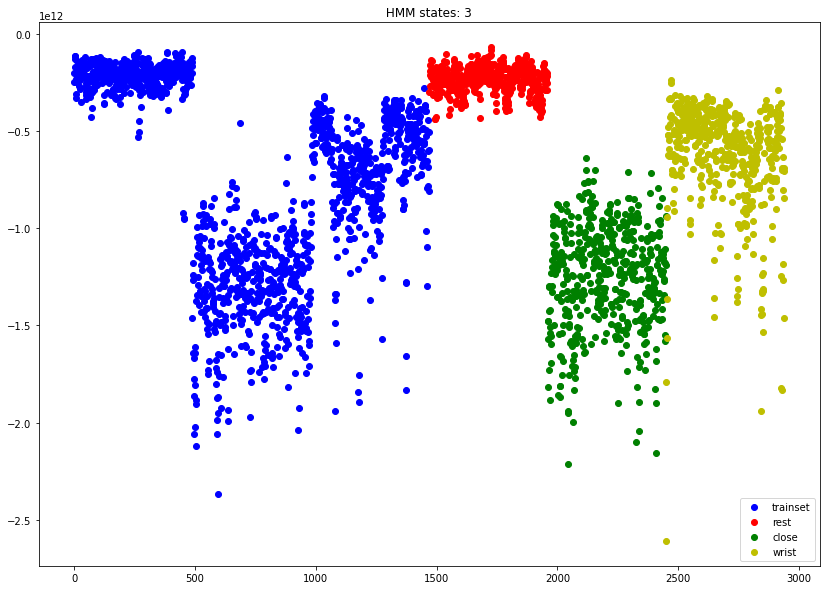

[[9.89506605e-001 1.04933951e-002 1.10028703e-145]
 [1.00542185e-002 9.89945782e-001 8.02609127e-170]
 [4.42460766e-157 3.00523313e-221 1.00000000e+000]]
[[0.06797019 0.06960673 0.05824183 0.06502981 0.03464337 0.09691328
  0.06368888 0.06615275 0.0738418  0.07681171 0.1010159  0.07758225
  0.04969013 0.06466426 0.01246651 0.02168059]
 [0.01707641 0.03468446 0.06941664 0.10342238 0.04971117 0.07787838
  0.02199597 0.09021777 0.0581495  0.09466156 0.04936776 0.06450844
  0.05321992 0.08924389 0.02953467 0.09691108]
 [0.00816327 0.06602013 0.0903354  0.02266532 0.08816908 0.06692697
  0.06540886 0.08600713 0.04551595 0.00612245 0.06705639 0.08815544
  0.07222053 0.06462415 0.09625194 0.06635699]]
[0.34637583 0.32029083 0.33333333]


In [7]:
classifier = fit_hmm(n_components=3, n_mix=16)
A = np.array(classifier.transmat_)
print(A)
B = np.array(classifier.weights_)
print(B)
pi = np.array(classifier.startprob_)
print(pi)

In [8]:
print("==================================================================================================================================================================")
test_states = []
plot_series = []
test_states = classifier.predict(X_rest, len(X_rest))

e0 = 0
e1 = 0
e2 = 0
for i in range (len(test_states)):
    if (test_states[i] == 0):
        e0+=1
    if (test_states[i] == 1):
        e1+=1 
    if (test_states[i] == 2):
        e1+=1
print("REST HAND")
print("Total = " + str(e1 + e2 + e0))
print("Acertos  = " + str(e1))
print("Erros    = " + str(e2 + e1))
print("Acurácia = " + str( 100* (e1/len(test_states)) ) + "%")
print("e0 = " + str(e0))
print("e1 = " + str(e1))
print("e2 = " + str(e2))


##########################################################################################################################################################################
print("==================================================================================================================================================================")
test_states = []
plot_series = []
test_states = classifier.predict(X_close, len(X_close))

e0 = 0
e1 = 0
e2 = 0
for i in range (len(test_states)):
    if (test_states[i] == 0):
        e0+=1
    if (test_states[i] == 1):
        e1+=1 
    if (test_states[i] == 2):
        e1+=1
print("CLOSE HAND")
print("Total = " + str(e1 + e2 + e0))
print("Acertos  = " + str(e0))
print("Erros    = " + str(e2 + e1))
print("Acurácia = " + str( 100* (e0/len(test_states)) ) + "%")
print("e0 = " + str(e0))
print("e1 = " + str(e1))
print("e2 = " + str(e2))

#########################################################################################################################################################################
print("==================================================================================================================================================================")
test_states = []
plot_series = []
test_states = classifier.predict(X_wrist, len(X_wrist))

e0 = 0
e1 = 0
e2 = 0
for i in range (len(test_states)):
    if (test_states[i] == 0):
        e0+=1
    if (test_states[i] == 1):
        e1+=1 
    if (test_states[i] == 2):
        e2+=1
print("WRIST HAND")
print("Total = " + str(e1 + e2 + e0))
print("Acertos  = " + str(e2))
print("Erros    = " + str(e1 + e0))
print("Acurácia = " + str( 100* (e2/len(test_states)) ) + "%")
print("e0 = " + str(e0))
print("e1 = " + str(e1))
print("e2 = " + str(e2))

#########################################################################################################################################################################
print("==================================================================================================================================================================")

test_states = []
plot_series = []
test_states = classifier.predict(X_test, len(X_test)) # Test = concatenate ( rest, close, wrist)

e0 = 0
e1 = 0
e2 = 0
for i in range (len(test_states)):
    if (i == 490 or i == 980):
        print(i)
        print("e0 = " + str(e0))
        print("e1 = " + str(e1))
        print("e2 = " + str(e2))         
    if (test_states[i] == 0):
        e0+=1
    if (test_states[i] == 1):
        e1+=1 
    if (test_states[i] == 2):
        e2+=1
print("TEST")
print("e0 = " + str(e0))
print("e1 = " + str(e1))
print("e2 = " + str(e2))
print(len(test_states))



REST HAND
Total = 490
Acertos  = 490
Erros    = 490
Acurácia = 100.0%
e0 = 0
e1 = 490
e2 = 0
CLOSE HAND
Total = 490
Acertos  = 51
Erros    = 439
Acurácia = 10.408163265306122%
e0 = 51
e1 = 439
e2 = 0
WRIST HAND
Total = 490
Acertos  = 0
Erros    = 490
Acurácia = 0.0%
e0 = 452
e1 = 38
e2 = 0
490
e0 = 1
e1 = 0
e2 = 489
980
e0 = 52
e1 = 439
e2 = 489
TEST
e0 = 504
e1 = 477
e2 = 489
1470


# Test with a varied signal

## read file
## segment
## extract features
## predict with trained model
## plot and analyse

Total = 398
Estado 0  = 74
Estado 1    = 168
Estado 2 = 156


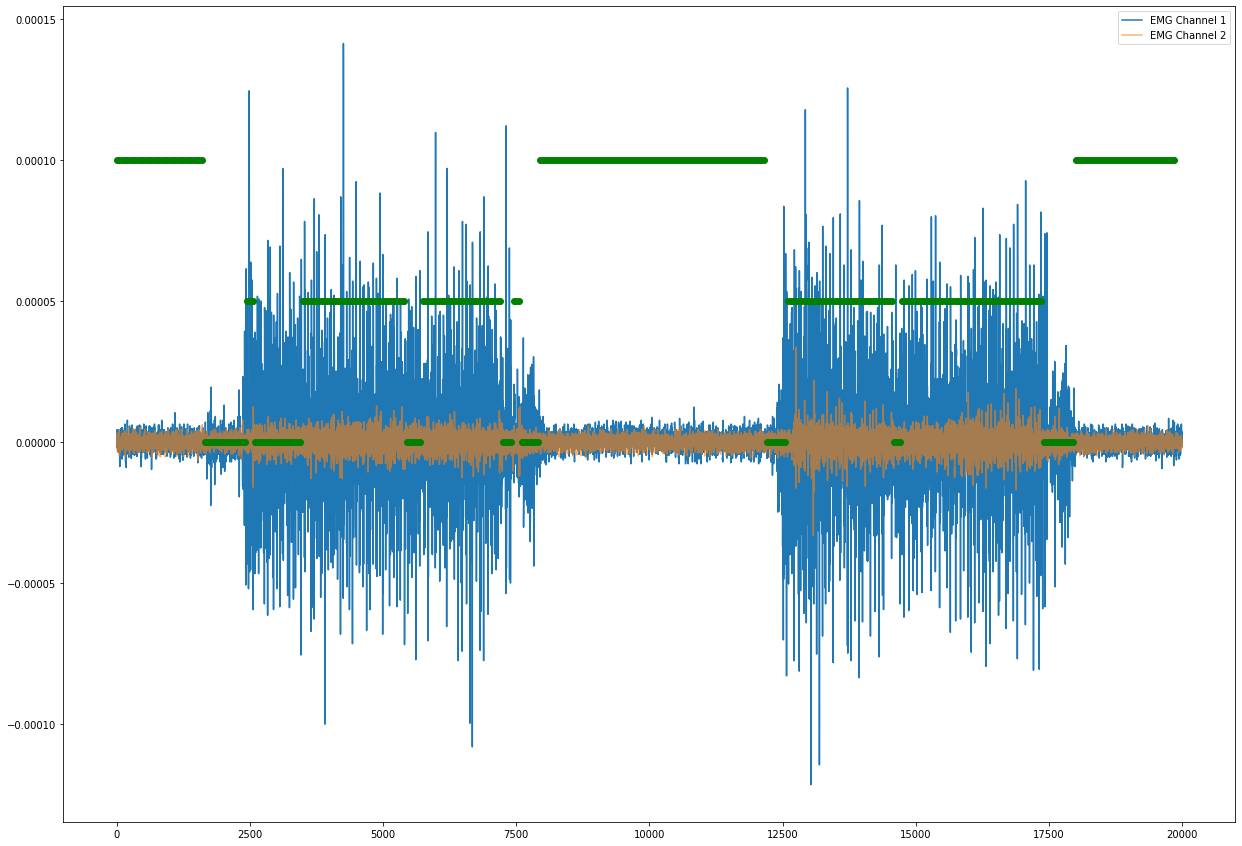

In [9]:
########################################################################################################################################################################
#READ FILE
########################################################################################################################################################################
file_name = 'https://raw.githubusercontent.com/raphaelrcb/TCC_UnB/raphael_dev/data/teste_1.csv'

final_test_series1 = read_csv(file_name, header=2, usecols = [0,1], index_col = 0)
final_test_series1.index = pd.to_datetime(final_test_series1.index, unit = 's', origin= 'unix')
final_test_series1.index = final_test_series1.index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
final_test_series1.index = pd.DatetimeIndex(final_test_series1.index).to_period('L')


final_test_series2 = read_csv(file_name, header=2, usecols = [0,2], index_col = 0)
final_test_series2.index = pd.to_datetime(final_test_series2.index, unit = 's', origin= 'unix')
final_test_series2.index = final_test_series2.index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
final_test_series2.index = pd.DatetimeIndex(final_test_series2.index).to_period('L')

########################################################################################################################################################################
# SEGMENTING DATA
########################################################################################################################################################################

data_size = len(final_test_series1)
window_size = 150
window_overlap = 50

n_windows = (data_size - window_size)/window_overlap + 1

final_windows1 = []
final_windows2 = []

for i in range(int(n_windows)):
    final_windows1.append(final_test_series1[(i*window_overlap):(i*window_overlap + window_size)] )
    final_windows2.append(final_test_series2[(i*window_overlap):(i*window_overlap + window_size)] )

########################################################################################################################################################################
# FEATURE EXTRACTION
########################################################################################################################################################################



final_features = []
final_features2 = []
for i in range(int(n_windows)):
    #extracting for rest gesture
    ar_model = ARIMA(final_windows1[i], order = (4,0,0))
    ar_fit   = ar_model.fit(method='yule_walker')
    final_features.append(ar_fit.polynomial_ar)
    final_features[i] = np.delete(final_features[i], 0)
    final_features[i] = -final_features[i]

    ar_model = ARIMA(final_windows2[i], order = (4,0,0))
    ar_fit   = ar_model.fit(method='yule_walker')
    final_features2 = ar_fit.polynomial_ar
    final_features2 = np.delete(final_features2, 0)
    final_features[i] = np.append(final_features[i], -final_features2)

    final_features[i] = np.append(final_features[i], rms(final_windows1[i].to_numpy().flatten()), len(final_windows1[i]))
    final_features[i] = np.append(final_features[i], rms(final_windows2[i].to_numpy().flatten()), len(final_windows2[i]))

# print(final_features[0])
########################################################################################################################################################################
# PREDICT WITH TRAINED MODEL
########################################################################################################################################################################

final_states = classifier.predict(final_features, len(final_features))
e0 = 0
e1 = 0
e2 = 0
for i in range (len(final_states)):
    if (final_states[i] == 0):
        e0+=1
    if (final_states[i] == 1):
        e1+=1 
    if (final_states[i] == 2):
        e2+=1
print("Total = " + str(e1 + e2 + e0))
print("Estado 0  = " + str(e0))
print("Estado 1    = " + str(e1))
print("Estado 2 = " + str(e2))


########################################################################################################################################################################
# PLOT
########################################################################################################################################################################

plot_series = final_test_series1.to_numpy()
plt.figure(figsize=(21,15))

plt.plot(np.arange(plot_series.size), plot_series.flatten(), label='EMG Channel 1')
plot_series = final_test_series2.to_numpy()
plt.plot(np.arange(plot_series.size), plot_series.flatten(), label='EMG Channel 2', alpha = 0.6)

plt.plot((np.arange(start=0, stop=len(final_states)*window_overlap, step=window_overlap)), (final_states)/20000, marker = 'o', linestyle='', c = 'g')
plt.legend()
plt.show()